In this notebook, I do some exploratory data analysis in order to understand the dataset before starting any further work related to feature engineering and model building.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


We note that the dataset has already gone through some preprocessing, transforming categorical features such as *sex* into numerical ones.

In [11]:
target = 'target'
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = [col for col in df.columns if col not in numerical_features + [target]]

# check # features = 13 (14 - target)
(len(numerical_features) + len(categorical_features)) == 13

True

In [3]:
print(f"Number of samples = {df.shape[0]} | Number of attributes = {df.shape[1]}")

Number of samples = 1025 | Number of attributes = 14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


We can notice that there is no missing data. This is useful later on since it means we would not need to handle missing values.

In [5]:
# let's check the class distribution
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

The class distribution is rather good, with a pretty balanced distribution.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'No')

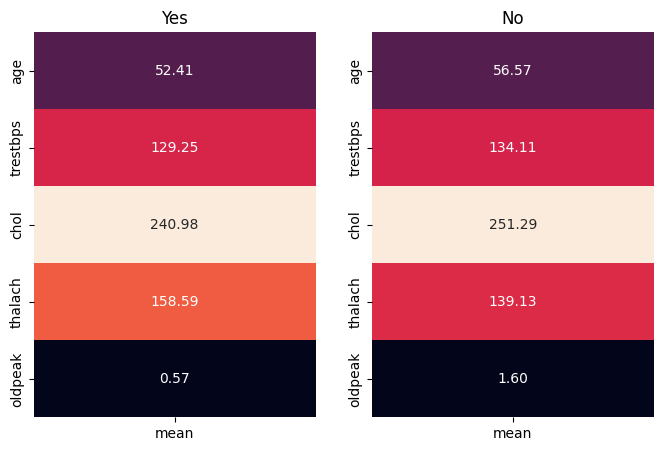

In [16]:
yes_df = df[df.target == 1].describe()[numerical_features].T
no_df = df[df.target == 0].describe()[numerical_features].T

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.heatmap(yes_df[['mean']], annot=True, cbar=False, fmt='.2f')
plt.title("Yes")

plt.subplot(1, 2, 2)
sns.heatmap(no_df[['mean']], annot=True, cbar=False, fmt='.2f')
plt.title("No")

In [20]:
for i, cat_feat in enumerate(categorical_features):
    print(i, cat_feat)

0 sex
1 cp
2 fbs
3 restecg
4 exang
5 slope
6 ca
7 thal


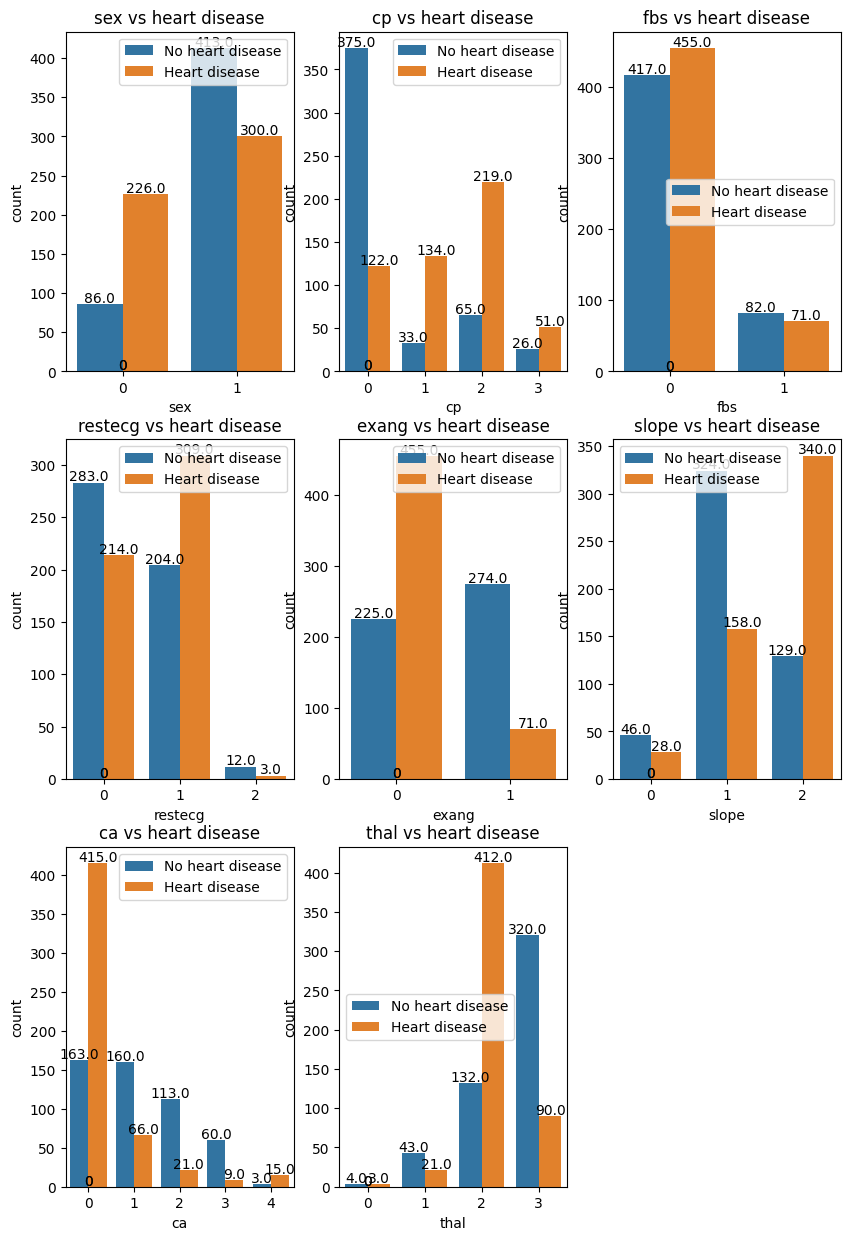

In [21]:
plt.figure(figsize=(10, 15))
for i, cat_feat in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(data=df, x=cat_feat, hue=target)
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2, 
            rect.get_height() + 2, rect.get_height(), 
            horizontalalignment='center', fontsize=10
        )
    title = cat_feat + ' vs heart disease'
    plt.legend(['No heart disease','Heart disease'])
    plt.title(title)

<Axes: >

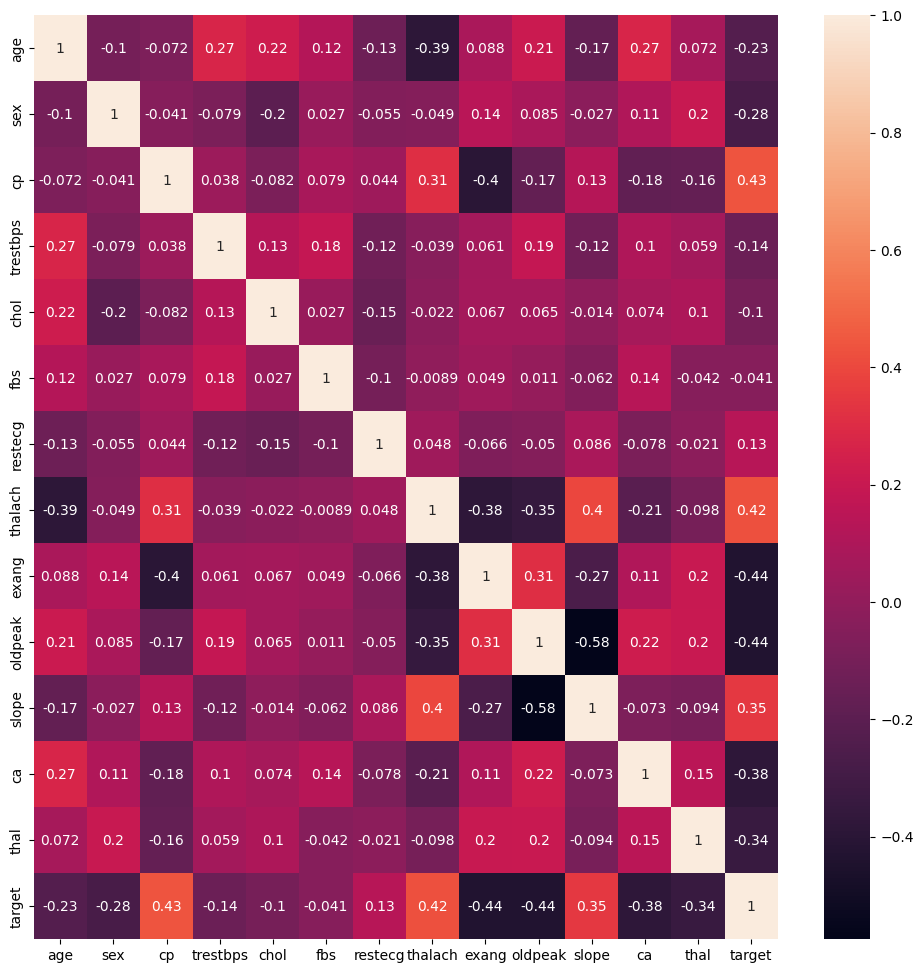

In [40]:
# check for multi-colinearity between features
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)
# corrMat = plt.matshow(corr, fignum = 1)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
# plt.yticks(range(len(corr.columns)), corr.columns)
# plt.gca().xaxis.tick_bottom()
# plt.colorbar(corrMat)

We can note that no two features are highly correlated, which is good for our modeling later.

In [36]:
df.duplicated().sum().item()

723

That is quite a lot of duplicated data sample. In the end, we are left with $1025 - 723 = 302$. (Very) small final dataset.

In [41]:
# Keep all duplicated rows (including first occurrences)
dupes = df[df.duplicated(keep=False)]

# Group by all columns to identify unique duplicate groups
grouped_dupes = dupes.groupby(list(df.columns))

# Iterate over groups
# show only first 3
n = 0
for key, group in grouped_dupes:
    if n < 3:
        print(f"Duplicate group: {key}")
        print(group)
        print("-" * 40)
    else:
        break
    n += 1

Duplicate group: (np.int64(29), np.int64(1), np.int64(1), np.int64(130), np.int64(204), np.int64(0), np.int64(0), np.int64(202), np.int64(0), np.float64(0.0), np.int64(2), np.int64(0), np.int64(2), np.int64(1))
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
60    29    1   1       130   204    0        0      202      0      0.0   
64    29    1   1       130   204    0        0      202      0      0.0   
118   29    1   1       130   204    0        0      202      0      0.0   
668   29    1   1       130   204    0        0      202      0      0.0   

     slope  ca  thal  target  
60       2   0     2       1  
64       2   0     2       1  
118      2   0     2       1  
668      2   0     2       1  
----------------------------------------
Duplicate group: (np.int64(34), np.int64(0), np.int64(1), np.int64(118), np.int64(210), np.int64(0), np.int64(1), np.int64(192), np.int64(0), np.float64(0.7), np.int64(2), np.int64(0), np.int64(2), np.int64(1))
 

We will have to handle duplicates in the preprocessing stage.